# Recursive Feature Elimination (RFE) for Feature Selection in Python

Author: Jason Brownlee

Article from [machinelearningmastery](https://machinelearningmastery.com/rfe-feature-selection-in-python/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# RFE for classification

## Define dataset

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

## Summarize the dataset

In [3]:
print(X.shape, y.shape)

(1000, 10) (1000,)


## Create pipeline

In [6]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
pipeline

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('m', DecisionTreeClassifier())])

## Evaluate model

In [8]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([0.87, 0.83, 0.85, 0.91, 0.88, 0.93, 0.89, 0.87, 0.92, 0.89, 0.93,
       0.83, 0.9 , 0.92, 0.84, 0.95, 0.83, 0.87, 0.93, 0.86, 0.89, 0.9 ,
       0.88, 0.9 , 0.91, 0.87, 0.91, 0.89, 0.91, 0.88])

## Report performance

In [9]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.031)


## Fit the model on all available data

In [11]:
pipeline.fit(X, y)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('m', DecisionTreeClassifier())])

## Make a prediction for one example

In [12]:
data = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


# RFE for regression

## Define dataset

In [14]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Create pipeline

In [15]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=5)),
                ('m', DecisionTreeRegressor())])

# Evaluate model

In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([-23.78898885, -28.89031115, -24.64566446, -30.2466655 ,
       -28.84639104, -31.43763825, -30.0859523 , -24.79569975,
       -26.85055129, -27.46486542, -23.77701164, -26.59845063,
       -25.88392715, -26.50505201, -27.90893156, -28.60496694,
       -25.46724967, -27.36200639, -29.46475722, -27.06181332,
       -25.13497368, -30.21713335, -23.93221054, -25.19399345,
       -23.06633007, -29.05693719, -23.35525683, -28.99226013,
       -31.02525943, -23.16204467])

## Report performance

In [17]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -26.961 (2.490)


## Fit the model on all available data

In [18]:
pipeline.fit(X, y)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=5)),
                ('m', DecisionTreeRegressor())])

## Make a prediction for one example

In [19]:
data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


# RFE hyperparameters

## Explore number of features

### Get the dataset

In [21]:
def get_dataset():
    return make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

### Get a list models to evaluate

In [25]:
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

### Evaluate a give model using cross-validation

In [26]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

### define dataset

In [27]:
X, y = get_dataset()

### Get the models to evaluate

In [28]:
models = get_models()

### Evaluate the models and store results

In [29]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 0.720 (0.034)
>3 0.820 (0.033)
>4 0.873 (0.034)
>5 0.886 (0.030)
>6 0.890 (0.031)
>7 0.892 (0.027)
>8 0.889 (0.028)
>9 0.885 (0.026)


### Plot model performance for comparison

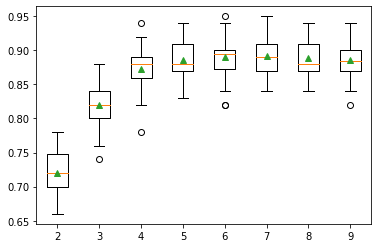

In [30]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Automatically select the number of features

### Create pipeline

In [33]:
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
pipeline

Pipeline(steps=[('s', RFECV(estimator=DecisionTreeClassifier())),
                ('m', DecisionTreeClassifier())])

### Evaluate model

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([0.91, 0.83, 0.87, 0.84, 0.89, 0.94, 0.87, 0.86, 0.91, 0.86, 0.93,
       0.85, 0.88, 0.88, 0.82, 0.93, 0.89, 0.87, 0.96, 0.88, 0.9 , 0.89,
       0.86, 0.82, 0.9 , 0.85, 0.91, 0.89, 0.88, 0.89])

### Report performance

In [35]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.882 (0.033)


## Which features were selected

### Define RFE

In [42]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

### Fit RFE

In [43]:
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

### Summarize all features

In [44]:
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


## Explore base algorithm

### Get a list of models to evaluate

In [46]:
def get_models_explore():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

### Get the models to evaluate

In [48]:
models = get_models_explore()
models

{'lr': Pipeline(steps=[('s',
                  RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'per': Pipeline(steps=[('s', RFE(estimator=Perceptron(), n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'cart': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'rf': Pipeline(steps=[('s',
                  RFE(estimator=RandomForestClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'gbm': Pipeline(steps=[('s',
                  RFE(estimator=GradientBoostingClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())])}

### Evaluate the models and store results

In [49]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.890 (0.029)
>per 0.843 (0.037)
>cart 0.886 (0.035)
>rf 0.850 (0.039)
>gbm 0.887 (0.037)


### Plot model performance for comparison

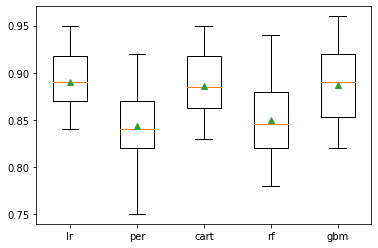

In [50]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()